In [1]:
# 누락값
# 어떻게 처리 또는 대체하는지가 포인트

In [2]:
import pandas as pd

In [4]:
ebola = pd.read_csv('csv\country_timeseries.csv')
ebola

# NA값의 양이 70~80%로 많을 경우 데이터 자체를 날리는 것이 맞긴 하지만 최대한 살려야 하는 것이 분석가의 몫.
# 어떻게 살리는지는 도메인 지식을 이용해야 한다.

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
ebola.isnull().sum()
ebola.isna().sum() # 둘이 같다.

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

In [6]:
ebola.info() # 데이터에 대한 전반적인 정보를 요약

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [7]:
## missingno 예를 이용해서 실제 미싱값이 어떤 분포인지 볼 수 있다
# bar
import missingno as msno

<AxesSubplot:>

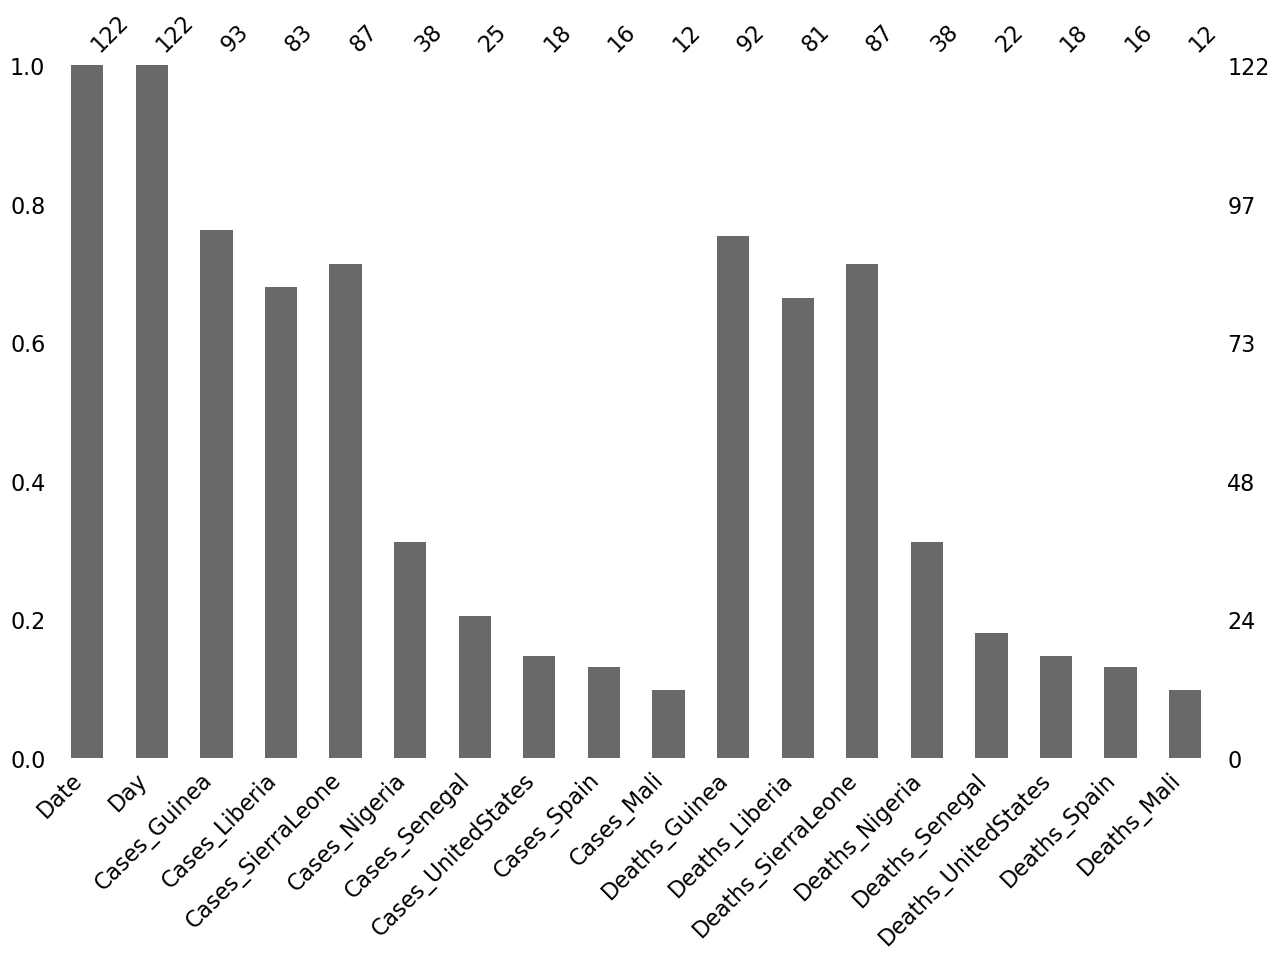

In [8]:
msno.bar(df = ebola, figsize=(15,9))

<AxesSubplot:>

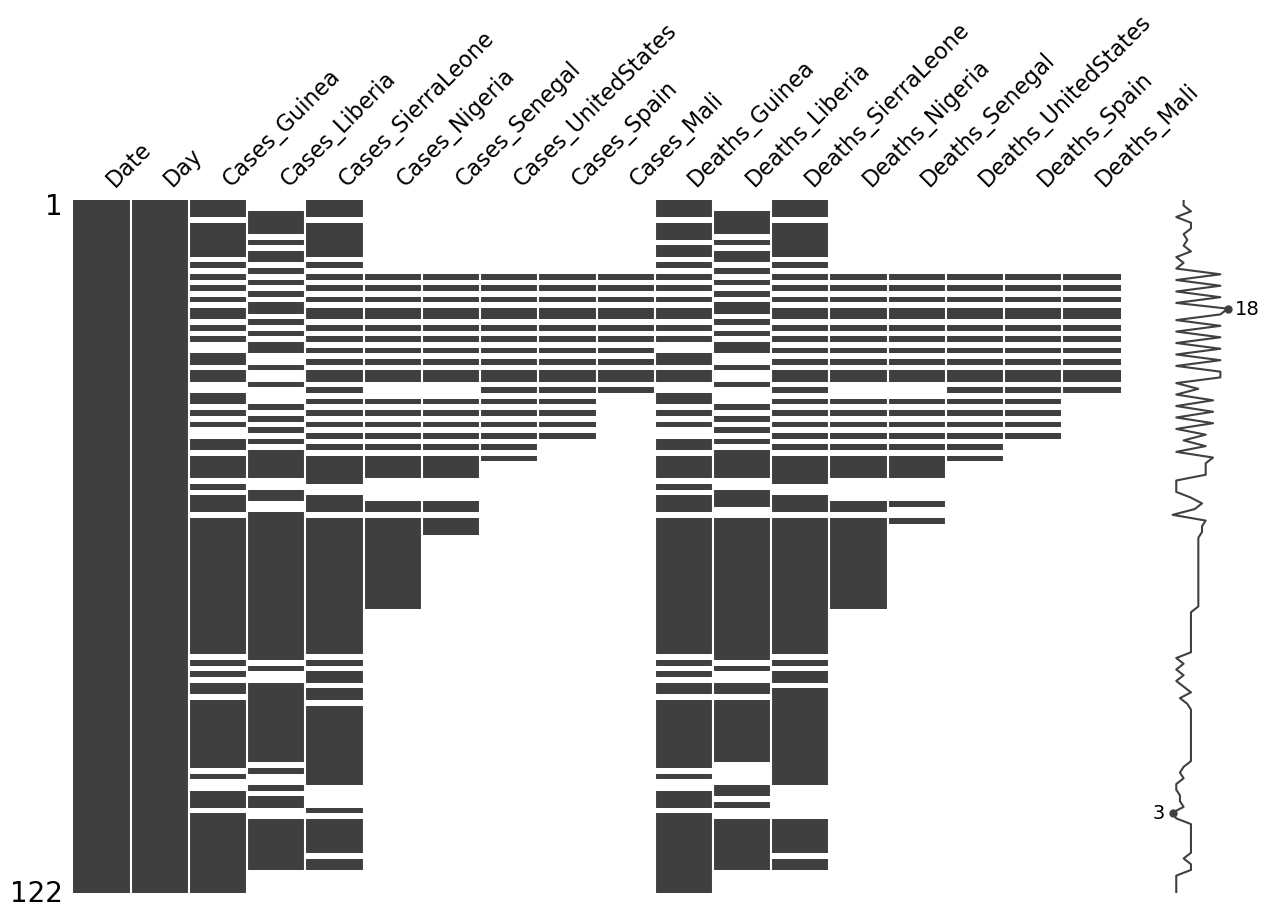

In [9]:
# matrix
msno.matrix(df = ebola, figsize=(15,9))

In [10]:
# NA값을 대체하는 법
ebola.iloc[0:10, 0:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,NaN,8157.0,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,NaN,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,NaN,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [11]:
ebola.iloc[0:10, 0:5]['Cases_Liberia'].mean() # NA값 대체 전, 평균값

8049.166666666667

In [12]:
ebola.fillna(0).iloc[0:10, 0:5]['Cases_Liberia'].mean() # NA값 0으로 대체 후, 평균값

4829.5

In [13]:
# ffill - 누락값이 나타나기 전의 값으로 누락값을 변경
ebola.fillna(method='ffill').iloc[0:10, 0:5]['Cases_Liberia']

0       NaN
1       NaN
2    8166.0
3    8157.0
4    8115.0
5    8018.0
6    8018.0
7    7977.0
8    7977.0
9    7862.0
Name: Cases_Liberia, dtype: float64

In [14]:
# bfill - 누락값이 나타난 이후 첫 번째 값으로 앞쪽의 누락값을 변경
ebola.fillna(method='bfill').iloc[0:10, 0:5]['Cases_Liberia']

0    8166.0
1    8166.0
2    8166.0
3    8157.0
4    8115.0
5    8018.0
6    7977.0
7    7977.0
8    7862.0
9    7862.0
Name: Cases_Liberia, dtype: float64

In [15]:
ebola.iloc[0:10, 0:5]['Cases_Liberia'].mean()

8049.166666666667

In [16]:
# 보간법 종류
# ['linear', 'time', 'index', 'values', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'krogh', 'spline', 'polynomial', 'from_derivatives', 'piecewise_polynomial', 'pchip', 'akima', 'cubicspline']

<AxesSubplot:>

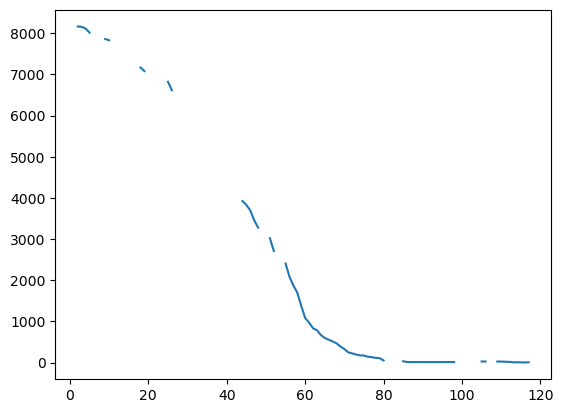

In [17]:
# plot 으로 누락값의 시각적 확인
ebola['Cases_Liberia'].plot()

<AxesSubplot:>

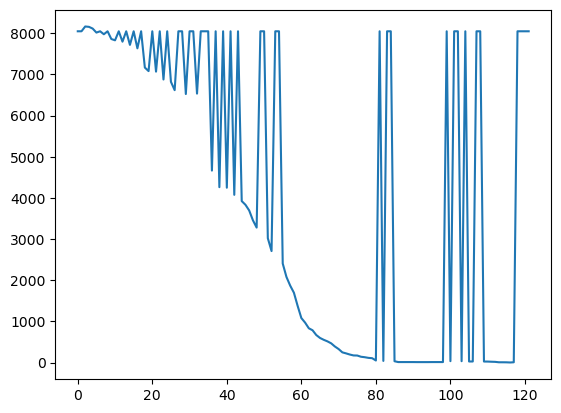

In [18]:
# 단순히 평균값으로 누락값 대체시 문제 발생
ebola.fillna(8049.2)['Cases_Liberia'].plot()

In [19]:
# linear 보간법 (default)
ebola.interpolate().iloc[0:10, 0:5]['Cases_Liberia']

0       NaN
1       NaN
2    8166.0
3    8157.0
4    8115.0
5    8018.0
6    7997.5
7    7977.0
8    7919.5
9    7862.0
Name: Cases_Liberia, dtype: float64

<AxesSubplot:>

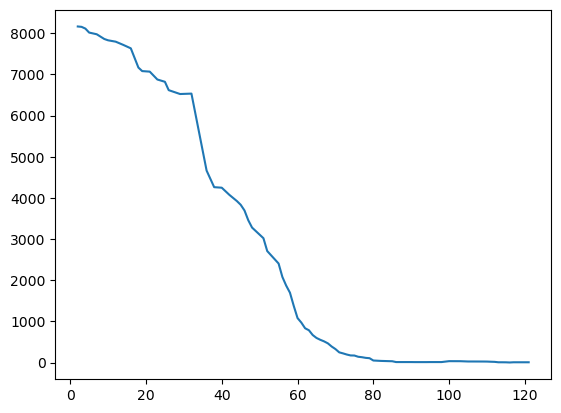

In [20]:
ebola.interpolate()['Cases_Liberia'].plot()
# 선형 보간법 - 직선으로 보간, 양쪽 끝 값의 평균값

<AxesSubplot:>

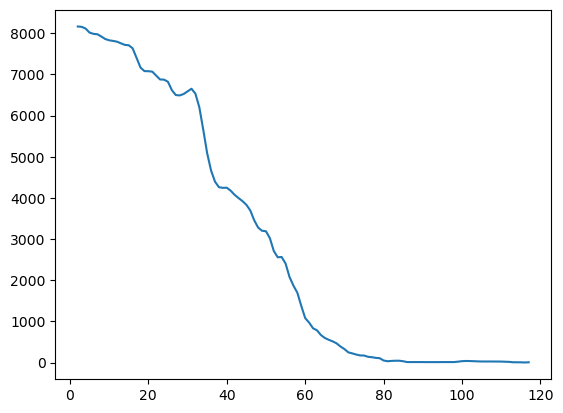

In [21]:
ebola.interpolate(method='quadratic')['Cases_Liberia'].plot()
# quadratic 보간법으로 누락값을 대체했을때
# 선형보간법으로 조금 더 부드럽게 연결되는 것을 확인할 수 있음

method must be one of ['linear', 'time', 'index', 'values', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'krogh', 'spline', 'polynomial', 'from_derivatives', 'piecewise_polynomial', 'pchip', 'akima', 'cubicspline']

In [22]:
# melt 함수

In [23]:
pew = pd.read_csv('csv/pew.csv')
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [24]:
pd.melt(pew, id_vars='religion') # id_vars: 유지할 열의 이름을 지정

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [25]:
pd.melt(pew, id_vars = 'religion', var_name = 'income', value_name = 'count')
# 위와 다르게 이름을 바꿔준 것

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [26]:
# 컬럼 자체가 시계열로 되어 있는 경우의 데이터
bill = pd.read_csv('csv/billboard.csv')
bill

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# 축을 1개 아닌 2개로 진행
bill_df = pd.melt(bill, id_vars = ['year', 'artist', 'track', 'time', 'date.entered'], var_name = 'week', value_name = 'rating')
bill_df

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [28]:
bill_df.drop_duplicates() # 중복값을 제거하는 방법
bill_df

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [29]:
# .transpose() 행과 열의 위치를 바꿔주는 메서드
bill.transpose()

,0,1,2,3,4,5,6,7,8,9,...,307,308,309,310,311,312,313,314,315,316
year,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
artist,2 Pac,2Ge+her,3 Doors Down,3 Doors Down,504 Boyz,98^0,A*Teens,Aaliyah,Aaliyah,"Adams, Yolanda",...,Westlife,"Williams, Robbie","Wills, Mark","Worley, Darryl","Wright, Chely",Yankee Grey,"Yearwood, Trisha",Ying Yang Twins,Zombie Nation,matchbox twenty
track,Baby Don't Cry (Keep...,The Hardest Part Of ...,Kryptonite,Loser,Wobble Wobble,Give Me Just One Nig...,Dancing Queen,I Don't Wanna,Try Again,Open My Heart,...,Swear It Again,Angels,Back At One,When You Need My Lov...,It Was,Another Nine Minutes,Real Live Woman,Whistle While You Tw...,Kernkraft 400,Bent
time,4:22,3:15,3:53,4:24,3:35,3:24,3:44,4:15,4:03,5:30,...,4:07,3:56,4:00,3:35,3:51,3:10,3:55,4:19,3:30,4:12
date.entered,2000-02-26,2000-09-02,2000-04-08,2000-10-21,2000-04-15,2000-08-19,2000-07-08,2000-01-29,2000-03-18,2000-08-26,...,2000-04-01,1999-11-20,2000-01-15,2000-06-17,2000-03-04,2000-04-29,2000-04-01,2000-03-18,2000-09-02,2000-04-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wk72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wk75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
ebola.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [31]:
ebola_sp = pd.melt(ebola, id_vars = ['Date', 'Day'])
ebola_sp

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0
...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN
1948,3/26/2014,4,Deaths_Mali,NaN
1949,3/25/2014,3,Deaths_Mali,NaN
1950,3/24/2014,2,Deaths_Mali,NaN


In [32]:
vr_sp = ebola_sp.variable.str.split('_')
vr_sp

# 컬럼 이름이 _로 나누어져 있었던 것을 split한 것

0       [Cases, Guinea]
1       [Cases, Guinea]
2       [Cases, Guinea]
3       [Cases, Guinea]
4       [Cases, Guinea]
             ...       
1947     [Deaths, Mali]
1948     [Deaths, Mali]
1949     [Deaths, Mali]
1950     [Deaths, Mali]
1951     [Deaths, Mali]
Name: variable, Length: 1952, dtype: object

In [33]:
# 인덱스 순서로 값 가져오기
case = vr_sp.str.get(0)
case

0        Cases
1        Cases
2        Cases
3        Cases
4        Cases
         ...  
1947    Deaths
1948    Deaths
1949    Deaths
1950    Deaths
1951    Deaths
Name: variable, Length: 1952, dtype: object

In [34]:
case_cr = vr_sp.str.get(1)
case_cr

0       Guinea
1       Guinea
2       Guinea
3       Guinea
4       Guinea
         ...  
1947      Mali
1948      Mali
1949      Mali
1950      Mali
1951      Mali
Name: variable, Length: 1952, dtype: object

In [35]:
# 파생 변수 만들기
ebola_sp['case']= case
ebola_sp['case_cr'] = case_cr
ebola_sp 

,Date,Day,variable,value,case,case_cr
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea
...,...,...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN,Deaths,Mali
1948,3/26/2014,4,Deaths_Mali,NaN,Deaths,Mali
1949,3/25/2014,3,Deaths_Mali,NaN,Deaths,Mali
1950,3/24/2014,2,Deaths_Mali,NaN,Deaths,Mali


In [36]:
# 피벗 테이블도 가능
# pd.pivot_table(데이터, index = '', columns = '', values = '', 집계함수도 가능)

In [37]:
pd.pivot_table(ebola_sp, columns='Date', values='value')

Date,1/2/2015,1/3/2015,1/4/2015,1/5/2015,10/1/2014,10/11/2014,10/12/2014,10/13/2014,10/14/2014,10/18/2014,...,9/14/2014,9/17/2014,9/19/2014,9/20/2014,9/21/2014,9/23/2014,9/28/2014,9/5/2014,9/7/2014,9/9/2014
value,5826.5,4805.833333,4319.75,4392.25,910.916667,3353.5,565.333333,3373.0,585.416667,3685.0,...,1324.5,2300.0,820.0,1203.0,918.0,966.5,1051.6,674.666667,661.6,2407.0


In [38]:
pd.pivot_table(ebola_sp, columns='variable', values='value')

variable,Cases_Guinea,Cases_Liberia,Cases_Mali,Cases_Nigeria,Cases_Senegal,Cases_SierraLeone,Cases_Spain,Cases_UnitedStates,Deaths_Guinea,Deaths_Liberia,Deaths_Mali,Deaths_Nigeria,Deaths_Senegal,Deaths_SierraLeone,Deaths_Spain,Deaths_UnitedStates
value,911.064516,2335.337349,3.5,16.736842,1.08,2427.367816,1.0,3.277778,563.23913,1101.209877,3.166667,6.131579,0.0,693.701149,0.1875,0.833333
